## **PROJECT 2**
## **Exploring Emissions Trends and Predictions: A Comprehensive Analysis of the NPRI Dataset**


Deeksha LNU

Jasnoor Kaur Khangura

Rahul Singla

Ravneet Singh Plaha

The National Pollutant Release Inventory (NPRI) dataset contains extensive information about pollutants released into the environment by various facilities in Canada. In a previous analysis, we processed this dataset to focus on two specific substances: Nitrogen Oxides (NOx) and Carbon Monoxide (CO). This decision was driven by the problem statement:

*Has the federal carbon pricing system (introduced in 2019) decreased emissions of nitrogen oxides and carbon monoxide? If so, what are the predicted decreases as carbon pricing gradually increases until 2030?*

In this project, we aim to explore the relationship between emissions, carbon pricing, and GDP. Since the primary focus is to determine how carbon pricing has influenced emissions over time and whether GDP is a significant factor in this context, we will follow a structured approach:

**Why Nitrogen Oxides and Carbon Monoxide?**

Nitrogen Oxides and Carbon Monoxide are significant pollutants released from burning fossil fuels. Understanding their emission trends provides valuable insights into the effectiveness of carbon pricing policies.

**Preprocessed Datasets**

The following steps were carried out in a prior analysis:

`Removing Irrelevant Columns`: Kept only the most relevant features for analysis.

`Handling Missing Values`: Applied appropriate techniques like filling missing values with means or zeros.

`Feature Engineering`: Merged various release categories to create columns like Total_Release_to_Air.

`Outlier Removal`: Identified and removed contextual and statistical outliers.

`Subset Creation`: Extracted two separate datasets focused solely on Nitrogen Oxides and Carbon Monoxide emissions.

We will now load these preprocessed files and continue the analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the preprocessed Nitrogen Oxides dataset
nitrogen_df = pd.read_csv('nitrogen_emissions_outliers_removed.csv', encoding='latin1')

# Load the preprocessed Carbon Monoxide dataset
carbon_df = pd.read_csv('carbon_monoxide_emissions_outliers_removed.csv', encoding='latin1')




# **Nitrogen Oxides (NOx) Dataset**
Total Entries: 73,053

Columns: 25

Key Features:

Reporting_Year / Anne: Year of reporting.

NPRI_ID / No_INRP: NPRI identification number.

Number of employees: Number of employees at the facility.

Company_Name / Dnomination_sociale_de_l'entreprise: Name of the company.

Facility_Name / Installation: Name of the facility.

NAICS / Code_SCIAN: Industry code.

NAICS Title / Titre Code_SCIAN: Industry classification title.

PROVINCE: Province where the facility is located.

City: City where the facility is located.

Latitude: Geographic latitude of the facility.

Longitude: Geographic longitude of the facility.

CAS_Number / No_CAS: CAS number of the substance.

Substance Name (English) / Nom de substance (Anglais): Name of the substance.

Units / Units: Units used for measuring emissions.

Estimation_Method / Mthode_destimation: Method used for estimating emissions.

Release to Air - Fugitive: Fugitive emissions to air.

Release to Air - Other Non-Point: Non-point source emissions to air.

Release to Air - Road dust: Emissions to air from road dust.

Release to Air - Spills: Emissions to air from spills.

Release to Air - Stack / Point: Stack or point source emissions to air.

Release to Air - Storage / Handling: Emissions to air from storage or handling.

Total_Release_to_Land: Total emissions to land.

Total_Release_to_Water_Bodies: Total emissions to water bodies.

Total_Release_to_Air: Total emissions to air for nitrogen oxides.

Log_Total_Release_to_Air: Log-transformed total emissions to air.

In [ ]:
print("Nitrogen Dataset Info:")
print(nitrogen_df.info())

Nitrogen Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73053 entries, 0 to 73052
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Reporting_Year / Anne                                  73053 non-null  object 
 1   NPRI_ID / No_INRP                                      73053 non-null  int64  
 2   Number of employees                                    73053 non-null  float64
 3   Company_Name / Dnomination_sociale_de_l'entreprise     73053 non-null  object 
 4   Facility_Name / Installation                           73023 non-null  object 
 5   NAICS / Code_SCIAN                                     73053 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         73053 non-null  object 
 7   PROVINCE                                               73053 non-null  object 
 8   City                   

In [ ]:
print("\nSample Data for Nitrogen Oxides:")
nitrogen_df.head()


Sample Data for Nitrogen Oxides:


,Reporting_Year / Anne,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Total_Release_to_Land,Total_Release_to_Water_Bodies,Total_Release_to_Air,Log_Total_Release_to_Air
0,2002-01-01,1,440.0,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0,0.0,0.0,0.0,1376.830,0.0,0.0,0.0,1376.830,7.228265
1,2002-01-01,4,450.0,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,0.0,0.0,0.0,0.0,260.803,0.0,0.0,0.0,260.803,5.567592
2,2002-01-01,54,850.0,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,0.0,0.0,0.0,0.0,453.570,0.0,0.0,0.0,453.570,6.119352
3,2002-01-01,106,25.0,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,0.0,0.0,0.0,0.0,648.139,0.0,0.0,0.0,648.139,6.475647
4,2002-01-01,126,345.0,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,0.0,0.0,0.0,0.0,415.000,0.0,0.0,0.0,415.000,6.030685


## **Carbon Monoxide (CO) Dataset**
Total Entries: 60,114

Columns: 24

Key Features:

Reporting_Year / Anne: Year of reporting.

NPRI_ID / No_INRP: NPRI identification number.

Number of employees: Number of employees at the facility.

Company_Name / Dnomination_sociale_de_l'entreprise: Name of the company.

Facility_Name / Installation: Name of the facility.

NAICS / Code_SCIAN: Industry code.

NAICS Title / Titre Code_SCIAN: Industry classification title.

PROVINCE: Province where the facility is located.

City: City where the facility is located.

Latitude: Geographic latitude of the facility.

Longitude: Geographic longitude of the facility.

CAS_Number / No_CAS: CAS number of the substance.

Substance Name (English) / Nom de substance (Anglais): Name of the substance.

Units / Units: Units used for measuring emissions.

Estimation_Method / Mthode_destimation: Method used for estimating emissions.

Release to Air - Fugitive: Fugitive emissions to air.

Release to Air - Other Non-Point: Non-point source emissions to air.

Release to Air - Road dust: Emissions to air from road dust.

Release to Air - Spills: Emissions to air from spills.

Release to Air - Stack / Point: Stack or point source emissions to air.

Release to Air - Storage / Handling: Emissions to air from storage or handling.

Total_Release_to_Land: Total emissions to land.

Total_Release_to_Water_Bodies: Total emissions to water bodies.

Total_Release_to_Air: Total emissions to air for nitrogen oxides.

Log_Total_Release_to_Air: Log-transformed total emissions to air.

In [ ]:
print("\nCarbon Monoxide Dataset Info:")
print(carbon_df.info())



Carbon Monoxide Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60114 entries, 0 to 60113
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Reporting_Year / Anne                                  60114 non-null  object 
 1   NPRI_ID / No_INRP                                      60114 non-null  int64  
 2   Number of employees                                    60114 non-null  float64
 3   Company_Name / Dnomination_sociale_de_l'entreprise     60114 non-null  object 
 4   Facility_Name / Installation                           60093 non-null  object 
 5   NAICS / Code_SCIAN                                     60114 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         60114 non-null  object 
 7   PROVINCE                                               60114 non-null  object 
 8   City           

In [ ]:
print("\nSample Data for Carbon Monoxide:")
carbon_df.head()


Sample Data for Carbon Monoxide:


,Reporting_Year / Anne,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Estimation_Method / Mthode_destimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Total_Release_to_Land,Total_Release_to_Water_Bodies,Total_Release_to_Air
0,2002-01-01,1,440.0,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,M - Monitoring or Direct Measurement,0.0,0.0,0.0,0.0,1763.150,0.0,0.0,0.0,1763.150
1,2002-01-01,4,450.0,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,M - Monitoring or Direct Measurement,0.0,0.0,0.0,0.0,2850.854,0.0,0.0,0.0,2850.854
2,2002-01-01,54,850.0,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,E - Emission Factor,0.0,0.0,0.0,0.0,30.910,0.0,0.0,0.0,30.910
3,2002-01-01,106,25.0,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,E - Emission Factor,0.0,0.0,0.0,0.0,56.269,0.0,0.0,0.0,56.269
4,2002-01-01,126,345.0,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,E - Emission Factor,0.0,0.0,0.0,0.0,281.060,0.0,0.0,0.0,281.060


In [ ]:
# Ensure both datasets have the same units for emissions (already in tonnes)
# Confirm no duplicates
nitrogen_df.duplicated().sum()
carbon_df.duplicated().sum()

0

In [ ]:
nitrogen_df['Reporting_Year / Anne'] = pd.to_datetime(nitrogen_df['Reporting_Year / Anne'])
carbon_df['Reporting_Year / Anne'] = pd.to_datetime(carbon_df['Reporting_Year / Anne'])

In [ ]:
# Ensure the alignment of key columns
key_columns = ['Reporting_Year / Anne', 'NAICS Title / Titre Code_SCIAN', 'Total_Release_to_Air']

# Check for missing values in key columns
nitrogen_df[key_columns].isnull().sum()
carbon_df[key_columns].isnull().sum()

,0
Reporting_Year / Anne,0
NAICS Title / Titre Code_SCIAN,0
Total_Release_to_Air,0


## **Carbon Pricing Dataset Integration**
The Carbon Pricing Dataset contains carbon tax rates for various provinces in Canada from 2019 to 2023. This dataset is essential for our analysis as carbon pricing is directly linked to emission reduction policies, making it a crucial factor to investigate its correlation with emissions trends.

Dataset Creation: We created this dataset ourselves by cross-checking provincial carbon pricing information from official government websites. Each province's carbon tax rates were verified for accuracy to ensure the dataset aligns with real-world data.

Structure of Dataset:
The dataset includes columns for the year (Year) and the carbon tax rate for each province.

For example, British Columbia had a carbon tax rate of $40/ton in 2019, which  increased to $55/ton by 2023.

In [ ]:
carbon_pricing_data = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022, 2023],
    'BC': [40, 40, 45, 50, 55],
    'AB': [20, 30, 40, 50, 65],
    'SK': [20, 30, 40, 50, 65],
    'MB': [20, 30, 40, 50, 65],
    'ON': [20, 30, 40, 50, 65],
    'QC': [20, 30, 40, 50, 65],
    'NB': [20, 30, 40, 50, 65],
    'PE': [20, 30, 40, 50, 65],
    'NL': [20, 30, 40, 50, 65],
    'NS': [20, 30, 40, 50, 65],
    'NWT': [20, 30, 40, 50, 65],
    'Nunavut': [20, 30, 40, 50, 65],
    'Yukon': [20, 30, 40, 50, 65]
})


In [ ]:
carbon_pricing_data['Year'] = pd.to_datetime(carbon_pricing_data['Year'], format='%Y')

# **Data Merging Strategy**
Since our problem focuses on how carbon pricing influences emissions, we will:

Merge Carbon Pricing with Emissions Data:

First, we will merge the nitrogen oxide emissions dataset and the carbon pricing dataset using Year and Province as keys. This step will allow us to examine how carbon pricing impacts nitrogen oxide emissions across provinces over the years.
We will also perform the same process with the carbon monoxide emissions dataset separately.
Merge with GDP Data:

After merging the emissions and carbon pricing datasets, we will further merge the resulting data with the GDP dataset. This will enable us to analyze whether GDP influences emissions after considering carbon pricing.

*Objective*

The ultimate goal is to assess:

Whether carbon pricing is significantly associated with a reduction in emissions.

Whether GDP plays a significant role in affecting emissions after feature selection.

By conducting feature selection techniques, we will identify the importance of each feature, including GDP, in explaining emissions trends. This analysis will provide insights into the effectiveness of carbon pricing policies and the economic factors influencing emissions.

In [ ]:
# Melt the carbon pricing data to match 'Year' and 'Province' format
carbon_pricing_melted = carbon_pricing_data.melt(id_vars=['Year'], var_name='Province', value_name='Carbon_Price')


# **Merging Carbon Pricing Dataset with Nitrogen Emissions Data**

Now, we will merge the Carbon Pricing Dataset with the Nitrogen Oxide Emissions Dataset. This step is crucial as it allows us to analyze how carbon pricing policies have influenced nitrogen oxide emissions over the years across provinces.

The merging strategy:

Keys for Merging: The datasets will be merged based on the Year and Province columns.

Outcome: The merged dataset will include emission data along with the corresponding carbon pricing rates for each province and year.

In [ ]:
#  Merge the emissions data with the carbon pricing data
# Rename 'Reporting_Year / Anne' to 'Year' in your emissions dataset to match with the carbon pricing data
nitrogen_df.rename(columns={'Reporting_Year / Anne': 'Year'}, inplace=True)
nitrogen_df.rename(columns={'PROVINCE': 'Province'}, inplace=True)
# Perform the merge on 'Year' and 'Province'
merged_data_nitro = pd.merge(nitrogen_df, carbon_pricing_melted, how='left', left_on=['Year', 'Province'], right_on=['Year', 'Province'])
merged_data_nitro['Carbon_Price'] = merged_data_nitro['Carbon_Price'].fillna(0)

In [ ]:
merged_data_nitro['Year'] = merged_data_nitro['Year'].dt.year

In [ ]:
merged_data_nitro.head()

,Year,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Province,City,Latitude,...,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Total_Release_to_Land,Total_Release_to_Water_Bodies,Total_Release_to_Air,Log_Total_Release_to_Air,Carbon_Price
0,2002,1,440.0,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0,0.0,0.0,1376.830,0.0,0.0,0.0,1376.830,7.228265,0.0
1,2002,4,450.0,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,0.0,0.0,0.0,260.803,0.0,0.0,0.0,260.803,5.567592,0.0
2,2002,54,850.0,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,0.0,0.0,0.0,453.570,0.0,0.0,0.0,453.570,6.119352,0.0
3,2002,106,25.0,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,0.0,0.0,0.0,648.139,0.0,0.0,0.0,648.139,6.475647,0.0
4,2002,126,345.0,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,0.0,0.0,0.0,415.000,0.0,0.0,0.0,415.000,6.030685,0.0


# **Merging Carbon Pricing Dataset with Carbon Monoxide Emissions Data**

Now, we will follow a similar approach to merge the Carbon Pricing Dataset with the Carbon Monoxide Emissions Dataset. This will help us evaluate the impact of carbon pricing policies on carbon monoxide emissions over the years across provinces.

Merging Strategy:
Keys for Merging: The datasets will be merged based on the Year and Province columns, ensuring consistency with the nitrogen dataset.

Outcome: The resulting dataset will include carbon monoxide emissions data and the corresponding carbon pricing rates for each province and year, enabling a comprehensive analysis of their relationship.

In [ ]:
# Merge the emissions data with the carbon pricing data
# Rename 'Reporting_Year / Anne' to 'Year' in your emissions dataset to match with the carbon pricing data
carbon_df.rename(columns={'Reporting_Year / Anne': 'Year'}, inplace=True)
carbon_df.rename(columns={'PROVINCE': 'Province'}, inplace=True)

# Perform the merge on 'Year' and 'Province'
merged_data_carbon = pd.merge(carbon_df, carbon_pricing_melted, how='left', left_on=['Year', 'Province'], right_on=['Year', 'Province'])
merged_data_carbon['Carbon_Price'] = merged_data_carbon['Carbon_Price'].fillna(0)



In [ ]:
merged_data_carbon['Year'] = merged_data_carbon['Year'].dt.year

In [ ]:
merged_data_carbon.head()

,Year,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Province,City,Latitude,...,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Total_Release_to_Land,Total_Release_to_Water_Bodies,Total_Release_to_Air,Carbon_Price
0,2002,1,440.0,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0,0.0,0.0,0.0,1763.150,0.0,0.0,0.0,1763.150,0.0
1,2002,4,450.0,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,0.0,0.0,0.0,0.0,2850.854,0.0,0.0,0.0,2850.854,0.0
2,2002,54,850.0,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,0.0,0.0,0.0,0.0,30.910,0.0,0.0,0.0,30.910,0.0
3,2002,106,25.0,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,0.0,0.0,0.0,0.0,56.269,0.0,0.0,0.0,56.269,0.0
4,2002,126,345.0,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,0.0,0.0,0.0,0.0,281.060,0.0,0.0,0.0,281.060,0.0


# ***FOR NITROGEN EMMISSIONS***

## **GDP Dataset Integration**

To enhance the analysis of emissions from nitrogen oxides (NOx) and carbon monoxide (CO), we obtained a GDP dataset from Statistics Canada (https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610040201).

This dataset provides annual Gross Domestic Product (GDP) figures broken down by industry and province, reflecting the economic activity across different sectors and regions in Canada.

The rationale for including this dataset is to analyze the relationship between economic activity and pollutant emissions. By linking GDP data with the NOx and CO emissions datasets, we aim to:

`Understand Economic Contributions`:

Identify industries with higher emissions relative to their economic output.

Analyze whether economic growth correlates with increased or decreased emissions.

`Evaluate the Impact of Carbon Pricing`:

Compare the trends in GDP and emissions before and after the introduction of the federal carbon pricing system in 2019.

Assess whether economic output has been impacted by emission reduction measures.

`Gain Insights into Regional Differences`:

Explore the variations in emissions and GDP contributions across provinces.

Investigate if certain provinces have achieved better emission efficiency per GDP unit.

In [ ]:
# Load GDP dataset
gdp_df = pd.read_csv("36100402.csv")

<ipython-input-79-90e0fe3304af>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_df = pd.read_csv("36100402.csv")


In [ ]:
gdp_df.head()

,REF_DATE,GEO,DGUID,Value,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997,Newfoundland and Labrador,2016A000210,Current dollars,All industries [T001],Dollars,81,millions,6,v62460554,1.1.1,9588.2,NaN,NaN,NaN,1
1,1997,Newfoundland and Labrador,2016A000210,Current dollars,Goods-producing industries [T002],Dollars,81,millions,6,v62460555,1.1.2,2364.1,NaN,NaN,NaN,1
2,1997,Newfoundland and Labrador,2016A000210,Current dollars,Service-producing industries [T003],Dollars,81,millions,6,v62460556,1.1.3,7224.1,NaN,NaN,NaN,1
3,1997,Newfoundland and Labrador,2016A000210,Current dollars,Industrial production [T010],Dollars,81,millions,6,v62460557,1.1.4,1386.9,NaN,NaN,NaN,1
4,1997,Newfoundland and Labrador,2016A000210,Current dollars,Non-durable manufacturing industries [T011],Dollars,81,millions,6,v62460558,1.1.5,488.8,NaN,NaN,NaN,1


In [ ]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354861 entries, 0 to 354860
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   REF_DATE                                               354861 non-null  int64  
 1   GEO                                                    354861 non-null  object 
 2   DGUID                                                  354861 non-null  object 
 3   Value                                                  354861 non-null  object 
 4   North American Industry Classification System (NAICS)  354861 non-null  object 
 5   UOM                                                    354861 non-null  object 
 6   UOM_ID                                                 354861 non-null  int64  
 7   SCALAR_FACTOR                                          354861 non-null  object 
 8   SCALAR_ID                         

In [ ]:
gdp_df.isnull().sum()

,0
REF_DATE,0
GEO,0
DGUID,0
Value,0
North American Industry Classification System (NAICS),0
UOM,0
UOM_ID,0
SCALAR_FACTOR,0
SCALAR_ID,0
VECTOR,0


## **Aligning Datasets**

Aligning datasets is a crucial step to ensure compatibility between two data sources.

In this case:

**Why Align?**

The GDP dataset and Nitrogen emissions dataset need to be aligned to enable meaningful analysis of the relationship between economic output (GDP) and emissions levels.

Alignment ensures both datasets use the same format for shared attributes like Province, Year, and Industry Classification (NAICS).

**How to Align?**

`PROVINCE`: Standardizing the province abbreviations.

`Year`: Ensuring the year format is consistent in both datasets.

`NAICS Titles`: Mapping industry classifications between the datasets.

**Goal of Alignment:**

Prepare the data for merging while preserving all essential records, even if industry classifications do not perfectly align.


In [ ]:
gdp_df.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Province',
    'North American Industry Classification System (NAICS)': 'NAICS',
    'VALUE': 'GDP'
}, inplace=True)

In the GDP dataset, provinces were originally listed using their full names (e.g., "Alberta," "Ontario"), while the Nitrogen emissions dataset and carbon monoxide as well, represented provinces using abbreviations (e.g., "AB," "ON"). To ensure consistency and compatibility between these two datasets, we performed province mapping.

What Is Done?

Mapped Full Names to Abbreviations:

Using a dictionary, each full province name in the GDP dataset was mapped to its corresponding abbreviation. For example:

Alberta → AB

Ontario → ON

Quebec → QC

Standardized the Column Names:
Both datasets now share a common column name, PROVINCE, ensuring that province data is consistently formatted and ready for merging.

In [ ]:
gdp_df['Province'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
       'Nunavut'], dtype=object)

In [ ]:
merged_data_nitro['Province'].unique()

array(['AB', 'MB', 'NB', 'ON', 'QC', 'BC', 'SK', 'NT', 'NS', 'NU', 'PE',
       'NL', 'YT'], dtype=object)

In [ ]:
# Mapping full province names to abbreviations
province_mapping = {
    'Newfoundland and Labrador': 'NL',
    'Prince Edward Island': 'PE',
    'Nova Scotia': 'NS',
    'New Brunswick': 'NB',
    'Quebec': 'QC',
    'Ontario': 'ON',
    'Manitoba': 'MB',
    'Saskatchewan': 'SK',
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Yukon': 'YT',
    'Northwest Territories': 'NT',
    'Nunavut': 'NU'
}

# Apply mapping to align province names in gdp_df
gdp_df['Province'] = gdp_df['Province'].map(province_mapping)

# Verify the mapping
gdp_df[['Province']].drop_duplicates()

,Province
0,NL
1011,PE
2022,NS
3033,NB
4044,QC
5055,ON
6066,MB
7077,SK
8088,AB
9099,BC


## **MERGING DATASETS**

`Aggregate GDP Data by Year and Province`:

Because the GDP dataset has duplicate rows for the same year and province (based on NAICS codes), we should aggregate GDP values (e.g., sum or average) by year and province, to ensure a one-to-one relationship between entries during the merge.

`Merge the Aggregated GDP Data with Nitrogen Dataset`:

Perform an inner merge using the Year and Province columns to combine the datasets.

In [ ]:
gdp_df['Year'].unique()


array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

In [ ]:

# Aggregate GDP data by Year and Province
aggregated_gdp_df = gdp_df.groupby(['Year', 'Province'], as_index=False).agg({'GDP': 'sum'})

# Merge datasets on Year and Province
merged_nitro_gdp = merged_data_nitro.merge(aggregated_gdp_df, on=['Year', 'Province'], how='inner')

# Verify the merged dataset

print("Sample Data:")
merged_nitro_gdp.head(10)


Sample Data:


,Year,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Province,City,Latitude,...,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Total_Release_to_Land,Total_Release_to_Water_Bodies,Total_Release_to_Air,Log_Total_Release_to_Air,Carbon_Price,GDP
0,2002,1,440.0,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0,0.0,1376.830,0.0,0.0,0.0,1376.830,7.228265,0.0,2658067.903
1,2002,4,450.0,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,0.0,0.0,260.803,0.0,0.0,0.0,260.803,5.567592,0.0,613095.667
2,2002,54,850.0,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,0.0,0.0,453.570,0.0,0.0,0.0,453.570,6.119352,0.0,363005.326
3,2002,106,25.0,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,0.0,0.0,648.139,0.0,0.0,0.0,648.139,6.475647,0.0,2658067.903
4,2002,126,345.0,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,0.0,0.0,415.000,0.0,0.0,0.0,415.000,6.030685,0.0,2658067.903
5,2002,136,89.0,BORGWARNER CANADA INC,(blank),336350,Motor vehicle transmission and power train par...,ON,SIMCOE,42.848600,...,0.0,0.0,1.315,0.0,0.0,0.0,1.315,0.839410,0.0,8001254.606
6,2002,151,150.0,Canada Alloy Castings,(blank),331514,Steel foundries,ON,Kitchener,43.400310,...,0.0,0.0,2.200,0.0,0.0,0.0,2.200,1.163151,0.0,8001254.606
7,2002,159,68.0,CanAmera Foods - Altona,ALTONA PLANT,311224,Oilseed processing,MB,Altona,49.111480,...,0.0,0.0,20.014,0.0,0.0,0.0,20.014,3.045189,0.0,613095.667
8,2002,161,94.0,CanAmera Foods - Hamilton,HAMILTON PLANT,311224,Oilseed processing,ON,Hamilton,43.270220,...,0.0,0.0,36.927,0.0,0.0,0.0,36.927,3.635663,0.0,8001254.606
9,2002,211,75.0,Ville de QuÃÂ©bec,IncinÃÂ©rateur,562210,Waste treatment and disposal,QC,QuÃÂ©bec,46.828385,...,0.0,0.0,269.200,0.0,0.0,0.0,269.200,5.599162,0.0,4055810.688


In [ ]:
gdp_df['Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

In [ ]:
merged_nitro_gdp.shape

(73053, 27)

In [ ]:
# merged_nitro_gdp.to_csv('merged_dataset_Nitro_GDP.csv', index=False)

## *` After successfully merging these datasets, we will analyze and preprocess the data to prepare it for further insights, such as feature engineering and normalization.`*

First, we will analyze the dataset for missing values and handle them appropriately by either dropping rows/columns or filling in missing values. This ensures that the dataset is complete and ready for analysis.

In [ ]:
merged_nitro_gdp.isnull().sum()

,0
Year,0
NPRI_ID / No_INRP,0
Number of employees,0
Company_Name / Dnomination_sociale_de_l'entreprise,0
Facility_Name / Installation,30
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
Province,0
City,16227
Latitude,178


Based on the missing values summary in dataset:

City has the most missing values (16,227), but this column is primarily descriptive. It is not likely to directly affect any analysis or modeling, especially since we are more focused on quantitative features like GDP, Total_Release_to_Air, and Year.

Latitude and Longitude have minimal missing values (178 each). While these could be useful for geospatial analysis, their absence does not significantly impact our overall data integrity since other location identifiers (e.g., PROVINCE) are available.

Facility_Name / Installation has 30 missing values, which is negligible in the context of the dataset size and its relevance. Facility names are categorical and non-essential for numerical analysis or modeling.

Critical numerical columns like GDP, Year, and Total_Release_to_Air have no missing values, ensuring that the core of our analysis remains unaffected.

Now, We will ensure that all columns have the correct data types for analysis. For instance, Year should be an integer, and GDP should be a float for numerical calculations.

In [ ]:
# Check data types
print("Data Types:")
merged_nitro_gdp.dtypes


Data Types:


,0
Year,int32
NPRI_ID / No_INRP,int64
Number of employees,float64
Company_Name / Dnomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
Province,object
City,object
Latitude,float64


*Observations on Data Types*

Year:

Stored as int32, which is efficient and appropriate for a categorical-like variable.

Province:

Stored as object, which is expected for categorical data. Encoding will be necessary if this is used as a feature in modeling.
Numeric Features:

Most numeric columns (Carbon_Price, GDP, Total_Release_to_Air, etc.) are correctly identified as float64. These are ready for normalization or scaling.

However, Number of employees are stored in float but, it represents a discrete value (number of people), which is better represented as an integer.

Categorical Features:

Features like City, NAICS Title, and Company_Name are stored as object. These need to be evaluated for their relevance to the model.


In [ ]:
# Convert 'Number of employees' to integer
merged_nitro_gdp['Number of employees'] = merged_nitro_gdp['Number of employees'].astype(int)

# Verify the data type
print(merged_nitro_gdp['Number of employees'].dtype)

int64


## **Feature Encoding**

Machine learning models require numeric input, but some columns in our dataset (e.g., Province, Company_Name) are categorical. Feature encoding converts these categorical variables into numerical representations while preserving their informational value.

`Label Encoding for Province:`

Label Encoding assigns each unique category a numeric value. For example, Alberta (AB) might become 0, and British Columbia (BC) might become 1. This approach works well for ordinal or limited cardinality data where the categories represent discrete entities. Since Province is a compact column with unique values, Label Encoding ensures simplicity without increasing the dataset's dimensionality.

Why Important: It allows the model to process Province as a variable without creating a large feature space, ensuring better computational efficiency.

`One-Hot Encoding for Company_Name:`

One-Hot Encoding creates binary columns for each unique value in the Company_Name. For instance, if there are three companies: A, B, and C, three binary columns (Company_A, Company_B, Company_C) are created. Each row has a 1 under the corresponding column and 0 elsewhere.

Why Important: It prevents the model from assuming a numerical relationship between categories and works well for high-cardinality features like Company_Name or NAICS Title.

*We tried doing one hot encoding for Campany name But, The Company_Name column contains a large number of unique values, each representing a company. Encoding this column using techniques like one-hot encoding or frequency encoding would generate too many new features, leading to inefficiency and the risk of overfitting. Additionally, the column does not provide direct insights into emissions or GDP trends, so it is excluded from feature engineering. However, it is retained in the dataset for reference and potential future analysis.*

*Initially, we tried doing Label encoding for `Province` but we found out that:*
*If we used label encoding or numerical encoding (e.g., assigning 0, 1, 2, etc., to provinces), the model might assume there is an ordinal relationship between these numbers (e.g., 0 < 1 < 2). However, provinces are nominal categories with no inherent order, so this approach would introduce unnecessary bias into the model.*

*However, One-hot encoding eliminates this issue by creating a binary column for each province, where a value of 1 indicates the presence of a province, and 0 indicates its absence.*

*One-hot encoding allows each province to be treated as an independent category without any assumptions about their relationship. This ensures that all categorical information is preserved during model training.*

**Why Not Other Encoding Techniques?**

Label Encoding: This would assign a unique number to each province (e.g., AB = 1, BC = 2), creating a false ordinal relationship between provinces.

Binary Encoding: While it reduces dimensionality, binary encoding can still introduce some level of interpretability challenge compared to one-hot encoding.

Target Encoding: This method relies on the target variable (e.g., emissions), which could introduce data leakage, especially if not handled carefully.


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [ ]:
merged_nitro_gdp.rename(columns={'Company_Name / Dnomination_sociale_de_l\'entreprise': 'Company_Name'}, inplace=True)

In [ ]:
# Retain the original 'Province' column
original_province = merged_nitro_gdp['Province']

# Apply one-hot encoding to the 'Province' column
ohe = OneHotEncoder(sparse_output=False)
encoded_provinces = ohe.fit_transform(merged_nitro_gdp[['Province']])

# Create a DataFrame with one-hot encoded columns
encoded_province_df = pd.DataFrame(
    encoded_provinces,
    columns=ohe.get_feature_names_out(['Province'])
)

# Add the original and one-hot encoded columns back to the dataset
merged_nitro_gdp = pd.concat([merged_nitro_gdp, encoded_province_df], axis=1)

In [ ]:
merged_nitro_gdp.head()

,Year,NPRI_ID / No_INRP,Number of employees,Company_Name,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Province,City,Latitude,...,Province_NB,Province_NL,Province_NS,Province_NT,Province_NU,Province_ON,Province_PE,Province_QC,Province_SK,Province_YT
0,2002,1,440,ALBERTA PACIFIC FOREST INDUSTRIES,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002,4,450,TEMBEC INDUSTRIES,PINE FALLS OPERATIONS,322122,Newsprint mills,MB,PINE FALLS,50.568600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,54,850,NORANDA INC.,Brunswick Mine,212231,Lead-zinc ore mining,NB,BATHURST,47.471700,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002,106,25,Devon Canada Corporation,Dunvegan Sour Gas Plant,211113,Conventional oil and gas extraction,AB,Fairview,55.998570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002,126,345,AT PLASTICS INC.,Edmonton Site,325110,Petrochemical manufacturing,AB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **FEATURE ENGINEERING**

Standardization of GDP

Standardization is chosen for the GDP column to ensure all features are centered around 0 with a standard deviation of 1. This helps many machine learning models process the data effectively, as some algorithms (e.g., SVM, linear regression) perform better when features follow a standard normal distribution. Standardization is less sensitive to outliers than normalization, making it a more robust choice for this dataset.

In [ ]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply standardization to the 'GDP' column
merged_nitro_gdp['GDP_Standardized'] = scaler.fit_transform(merged_nitro_gdp[['GDP']])

# Verify the transformation
print("Standardized GDP Sample:")
print(merged_nitro_gdp[['GDP', 'GDP_Standardized']].head())

Standardized GDP Sample:
           GDP  GDP_Standardized
0  2658067.903         -0.689364
1   613095.667         -1.528492
2   363005.326         -1.631113
3  2658067.903         -0.689364
4  2658067.903         -0.689364


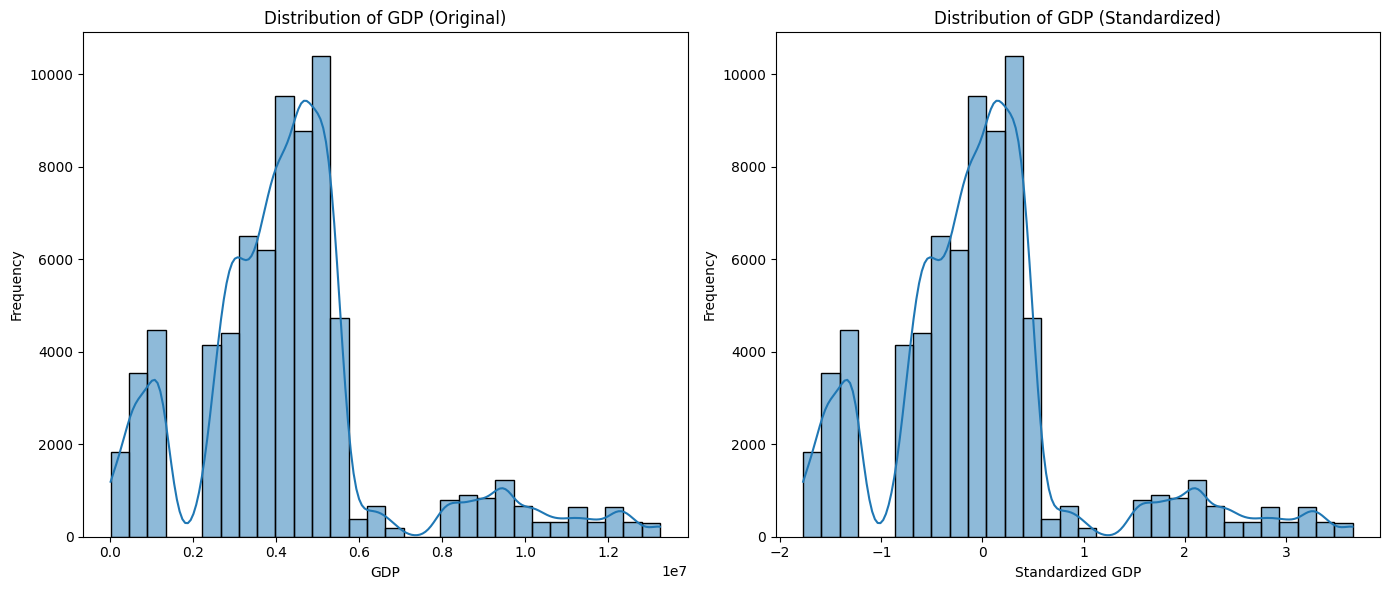

In [ ]:
# Create two subplots: Before and After Standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original GDP Distribution
sns.histplot(merged_nitro_gdp['GDP'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of GDP (Original)')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Frequency')

# Standardized GDP Distribution
sns.histplot(merged_nitro_gdp['GDP_Standardized'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of GDP (Standardized)')
axes[1].set_xlabel('Standardized GDP')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

*In this analysis, the GDP column was standardized to ensure it contributes appropriately to the analysis without dominating other features due to its larger scale.*

In [ ]:
merged_data_nitro.columns

Index(['Year', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dnomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'Province', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Units', 'Estimation_Method / Mthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Total_Release_to_Land', 'Total_Release_to_Water_Bodies',
       'Total_Release_to_Air', 'Log_Total_Release_to_Air', 'Carbon_Price'],
      dtype='object')

`*Feature engineering involves creating new features from the existing dataset to improve the performance of machine learning models. By understanding the dataset and the problem domain, we can create features that capture meaningful relationships between variables.*`



**Existing Feature: Total Release to Air**

We already created the Total_Release_to_Air column by summing various types of emissions (e.g., fugitive emissions, stack/point emissions). This feature consolidates multiple variables into one, making it easier for the model to learn and reducing dimensionality while retaining important information.

**Why it was created?**

Aggregation for Simplification: Combining multiple columns into one reduces noise and helps the model focus on a single feature that captures the total environmental impact.

Domain Knowledge: The total emissions released to the air are likely the most direct measure of environmental impact, which aligns with the problem of understanding the relationship between emissions, GDP, and carbon pricing.

New Features to Create:

1. Emissions per GDP

    Reason: Normalizes emissions relative to economic activity, helping the model understand how emissions scale with GDP.

    Impact: Captures the environmental efficiency of provinces.

2. Carbon Price Impact

    Reason: Quantifies how much emissions are financially penalized under the carbon pricing system, directly connecting emissions with carbon pricing.

    Impact: Helps determine if higher carbon prices reduce emissions.

3. Year-on-Year Change in Emissions
    Reason: Captures temporal trends and highlights whether emissions are increasing or decreasing.
    
    Impact: Useful for evaluating the effectiveness of carbon pricing over time.


In [ ]:
# Creating Emissions per GDP
merged_nitro_gdp['Emissions_per_GDP'] = (
    merged_nitro_gdp['Total_Release_to_Air'] / merged_nitro_gdp['GDP']
).replace([np.inf, -np.inf], np.nan).fillna(0)

# Creating Carbon Price Impact
merged_nitro_gdp['Carbon_Price_Impact'] = (
    merged_nitro_gdp['Carbon_Price'] * merged_nitro_gdp['Total_Release_to_Air']
)

# Verifying the newly created features
print(merged_nitro_gdp[['Emissions_per_GDP', 'Carbon_Price_Impact']].head())


   Emissions_per_GDP  Carbon_Price_Impact
0           0.000518                  0.0
1           0.000425                  0.0
2           0.001249                  0.0
3           0.000244                  0.0
4           0.000156                  0.0


Now, for next feature:

The dataset is grouped by Province and sorted by Year to calculate changes year-on-year within each province.

A new column YoY_Change_in_Emissions is created to store the difference in Total_Release_to_Air values between consecutive years for each province.

In [ ]:
# Ensure the data is sorted by Province and Year
merged_nitro_gdp = merged_nitro_gdp.sort_values(by=['Province', 'Year'])

# Calculate the Year-on-Year Change in Emissions
merged_nitro_gdp['YoY_Change_in_Emissions'] = merged_nitro_gdp.groupby('Province')['Total_Release_to_Air'].diff()

# Fill NaN values with 0 (optional, depends on how you want to handle missing differences)
merged_nitro_gdp['YoY_Change_in_Emissions'] = merged_nitro_gdp['YoY_Change_in_Emissions'].fillna(0)

# Display the dataset with the new feature
print("Sample of YoY_Change_in_Emissions:")
merged_nitro_gdp[['Year', 'Province', 'Total_Release_to_Air', 'YoY_Change_in_Emissions']].head(10)


Sample of YoY_Change_in_Emissions:


,Year,Province,Total_Release_to_Air,YoY_Change_in_Emissions
0,2002,AB,1376.830,0.000
3,2002,AB,648.139,-728.691
4,2002,AB,415.000,-233.139
11,2002,AB,913.800,498.800
15,2002,AB,13316.470,12402.670
16,2002,AB,363.240,-12953.230
19,2002,AB,2655.238,2291.998
28,2002,AB,140.420,-2514.818
30,2002,AB,1153.300,1012.880
33,2002,AB,2432.428,1279.128


*For each Province, the YoY_Change_in_Emissions column will contain the difference in emissions between consecutive years.*

*For the first year of each province, the value will be 0.*

**Normaliation of total emmissions to air column:**

We chose to normalize the Total_Release_to_Air feature to create a new feature, Normalized_Total_Emissions. This step was taken to ensure consistency across the dataset, as other features like GDP and Carbon_Price have already been normalized or standardized. Normalizing Total_Release_to_Air aligns its scale with the other features, enabling better model performance, especially for algorithms that rely on feature scaling, such as gradient-based models or distance-based metrics.

In [ ]:
# # Normalization of Total_Release_to_Air

# # Normalize the Total_Release_to_Air column
# scaler = MinMaxScaler()
# merged_nitro_gdp['Normalized_Total_Release_to_Air'] = scaler.fit_transform(merged_nitro_gdp[['Total_Release_to_Air']])

# # Plotting before and after normalization
# plt.figure(figsize=(14, 6))

# # Before Normalization
# plt.subplot(1, 2, 1)
# plt.hist(merged_nitro_gdp['Total_Release_to_Air'], bins=30, alpha=0.7, color='blue', edgecolor='black')
# plt.title('Distribution of Total_Release_to_Air (Original)')
# plt.xlabel('Total_Release_to_Air')
# plt.ylabel('Frequency')

# # After Normalization
# plt.subplot(1, 2, 2)
# plt.hist(merged_nitro_gdp['Normalized_Total_Release_to_Air'], bins=30, alpha=0.7, color='green', edgecolor='black')
# plt.title('Distribution of Total_Release_to_Air (Normalized)')
# plt.xlabel('Normalized_Total_Release_to_Air')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


Original Distribution: The original "Total_Release_to_Air" shows extreme skewness with values ranging significantly, making it challenging for machine learning models to converge efficiently or interpret feature importance properly.

Normalized Distribution: After normalization, the feature is scaled between 0 and 1. This transformation ensures that all features contribute equally to model training and eliminates the impact of differing scales.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize Total Release to Air
scaler = StandardScaler()

# Add a new column for the standardized values
merged_nitro_gdp['Standardized_Total_Release_to_Air'] = scaler.fit_transform(merged_nitro_gdp[['Total_Release_to_Air']])

# Display sample data
print("Sample Data with Standardized Total Release to Air:")
print(merged_nitro_gdp[['Total_Release_to_Air', 'Standardized_Total_Release_to_Air']].head())


Sample Data with Standardized Total Release to Air:
    Total_Release_to_Air  Standardized_Total_Release_to_Air
0               1376.830                           1.435052
3                648.139                           0.555330
4                415.000                           0.273869
11               913.800                           0.876052
15             13316.470                          15.849349


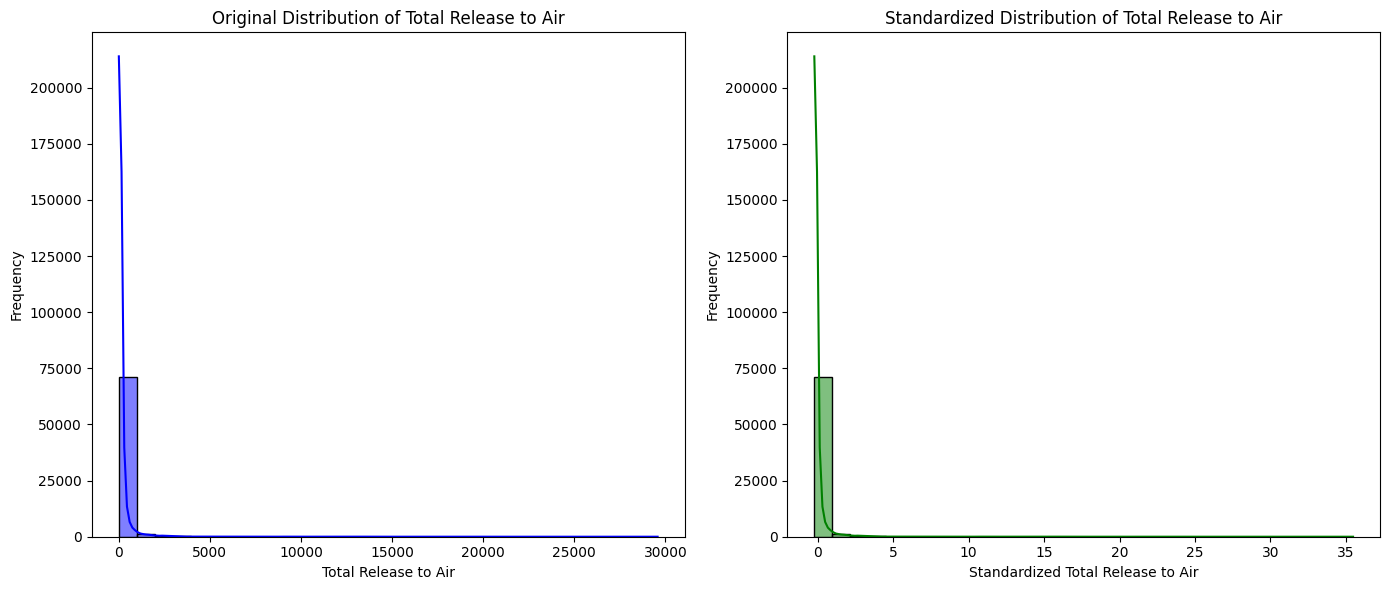

In [ ]:
# Plot the distribution of Total Release to Air before and after standardization
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(merged_nitro_gdp['Total_Release_to_Air'], bins=30, kde=True, color='blue')
plt.title("Original Distribution of Total Release to Air")
plt.xlabel("Total Release to Air")
plt.ylabel("Frequency")

# Standardized distribution
plt.subplot(1, 2, 2)
sns.histplot(merged_nitro_gdp['Standardized_Total_Release_to_Air'], bins=30, kde=True, color='green')
plt.title("Standardized Distribution of Total Release to Air")
plt.xlabel("Standardized Total Release to Air")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# **Analyzing Derived Features**

To analyze the derived features, we can generate visualizations that provide insights into the relationships and trends they represent. Since you created features like Year-on-Year Change in Emissions, Emission Intensity per GDP, and Normalized Emissions, we can create the following plots:

**Year-on-Year Change in Emissions**:

*A line plot to show how the emissions change year-on-year for different provinces.*

*A histogram or boxplot to analyze the distribution of the year-on-year change across provinces.*

**Emission Intensity per GDP**:

*A line plot to visualize the trend of emissions per GDP over the years, grouped by provinces.*

*A bar plot to compare emission intensity per GDP among provinces for specific years.*

**Normalized Emissions**:

*A scatter plot to compare normalized emissions against GDP.*

*A heatmap to analyze correlations between normalized emissions and other features.*

In [ ]:
merged_nitro_gdp.columns

Index(['Year', 'NPRI_ID / No_INRP', 'Number of employees', 'Company_Name',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'Province', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Units', 'Estimation_Method / Mthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Total_Release_to_Land', 'Total_Release_to_Water_Bodies',
       'Total_Release_to_Air', 'Log_Total_Release_to_Air', 'Carbon_Price',
       'GDP', 'Province_AB', 'Province_BC', 'Province_MB', 'Province_NB',
       'Province_NL', 'Province_NS', 'Province_NT', 'Province_NU',
       'Province_ON', 'Province_PE', 'Province_QC', 'Province_SK',
       'Province_YT', 'GDP_Standardized', 'Emissions_p

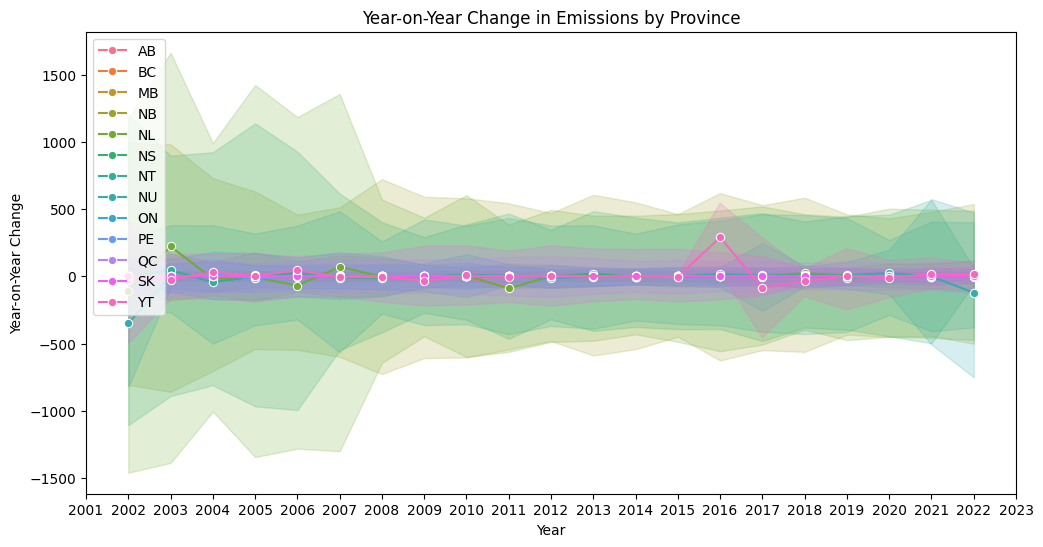

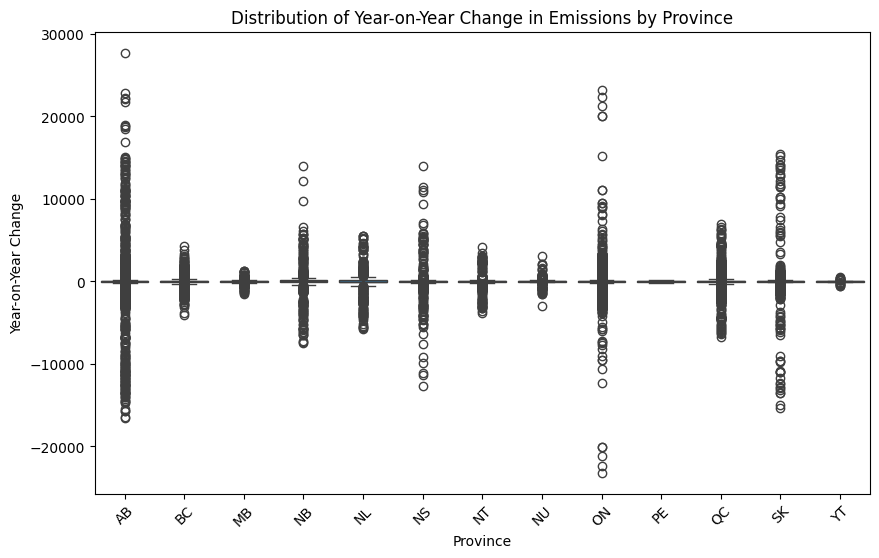

In [ ]:
import matplotlib.ticker as mticker
# Line plot for year-on-year change in emissions
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_nitro_gdp, x='Year', y='YoY_Change_in_Emissions', hue='Province', marker='o')
plt.title('Year-on-Year Change in Emissions by Province')
plt.xlabel('Year')
plt.ylabel('Year-on-Year Change')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(loc='best')
plt.show()

# Boxplot to analyze distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_nitro_gdp, x='Province', y='YoY_Change_in_Emissions')
plt.title('Distribution of Year-on-Year Change in Emissions by Province')
plt.xlabel('Province')
plt.ylabel('Year-on-Year Change')
plt.xticks(rotation=45)
plt.show()

*Box Plot Analysis:*

This shows the distribution of year-on-year changes in emissions across provinces.
Outliers can be seen, indicating significant changes in emissions for certain years in specific provinces.
The clustering around 0 suggests that most changes are minor, but provinces like Alberta (AB) and Quebec (QC) show wider variations.
Purpose: Highlights variability and outliers, identifying provinces where emissions fluctuate more significantly year-to-year.

*Line Plot with Confidence Interval:*

This illustrates the trend of year-on-year change in emissions over time, broken down by province.
Confidence intervals provide a sense of variability and uncertainty.
Provinces like Saskatchewan (SK) and Alberta (AB) display greater deviations compared to others.

In [ ]:
# Scatter plot for normalized emissions vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_nitro_gdp, x='GDP', y='Normalized_Total_Release_to_Air', hue='Province', alpha=0.7)
plt.title('Normalized Emissions vs GDP')
plt.xlabel('GDP')
plt.ylabel('Normalized Emissions')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()



ValueError: Could not interpret value `Normalized_Total_Release_to_Air` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

*Provinces with higher GDP generally tend to have a wider spread of emissions, indicating that economic activity might be linked to emissions levels.*
*Clusters at lower GDP values with lower emissions suggest that smaller economies contribute less to total emissions.*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for Nitrogen Emissions
correlation_matrix_nitrogen = merged_nitro_gdp[['GDP', 'Total_Release_to_Air']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_nitrogen, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix: Nitrogen Emissions')
plt.show()

# Correlation Matrix for Carbon Monoxide Emissions
correlation_matrix_carbon = merged_carbon_gdp[['GDP', 'Total_Release_to_Air']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_carbon, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix: Carbon Monoxide Emissions')
plt.show()


In [ ]:
# Heatmap to analyze correlations
plt.figure(figsize=(10, 8))
sns.heatmap(merged_nitro_gdp[['Normalized_Total_Release_to_Air', 'GDP', 'Emissions_per_GDP', 'YoY_Change_in_Emissions']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Derived Features')
plt.show()

*Positive correlations, such as between YoY_Change_in_Emissions and Normalized_Total_Release_to_Air, suggest that these features share information about emission dynamics.*
*Weak correlations (e.g., GDP with Normalized_Total_Release_to_Air) indicate that GDP might not directly affect emissions, but indirect relationships can still be explored.*

In [ ]:
# Line plot for emission intensity per GDP
merged_nitro_gdp['Year'] = pd.to_datetime(merged_nitro_gdp['Year'], format='%Y')
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_nitro_gdp, x='Year', y='Emissions_per_GDP', hue='Province', marker='o')
plt.title('Emission Intensity per GDP Over Years by Province')
plt.xlabel('Year')
plt.ylabel('Emission per GDP')
plt.legend(loc='best')
plt.show()




*This is critical for understanding how economic activity correlates with environmental impact. A consistent decline in emission intensity suggests improved efficiency.*

In [ ]:
merged_nitro_gdp.columns

# **Baseline Model Without Feature Selection**


Before applying feature selection techniques, we evaluate the performance of multiple classifiers using all available features. This helps establish a baseline for comparison after feature selection. Each model will be trained on 75% of the data and tested on 25%. Accuracy scores for all models will be calculated and represented in a sorted table.

In [ ]:
# Ensure 'Year' is numeric
merged_nitro_gdp['Year'] = pd.to_datetime(merged_nitro_gdp['Year'], format='%Y').dt.year


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the classifiers and models
classifiers = ['Logistic', 'RandomForest', 'DecisionTree', 'KNeighbors']
models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=200, random_state= 42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),

]

In [ ]:
# Define features (X) and target (y)
features = [
    'Year', 'Carbon_Price', 'GDP_Standardized', 'Emissions_per_GDP', 'YoY_Change_in_Emissions',
    'Province_AB', 'Province_BC', 'Province_MB', 'Province_NB', 'Province_NL',
    'Province_NS', 'Province_NT', 'Province_NU', 'Province_ON', 'Province_PE',
    'Province_QC', 'Province_SK', 'Province_YT'
]
X = merged_nitro_gdp[features]
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification (adjust threshold as needed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Calculate accuracy for all models
def acc_score(X_train, X_test, y_train, y_test):
    Score = pd.DataFrame({"Classifier": classifiers})
    acc = []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(y_test, predictions))
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    return Score

# Calculate and display accuracies
baseline_scores = acc_score(X_train, X_test, y_train, y_test)
print(baseline_scores)

# **Compare with Feature Selection Results:**

We'll perform feature selection using Pearson Correlation, P-Values (ANOVA F-Test), and Chi-Square, then train models with the selected features and compare their performance (MSE and R²) to this baseline.

#*Identifying Relevant Features using Pearson's Correlation*

Pearson Correlation for Feature Selection
Pearson Correlation measures the linear relationship between features and the target variable. Features with high absolute correlation values (positive or negative) with the target are considered predictive. Additionally, highly correlated independent features are redundant and may cause instability in model performance. To address this:

Features with a correlation above a threshold (e.g., 0.9) with each other are dropped.
Features with low absolute correlation with the target (below 0.1) are excluded.

In [ ]:

# Extract numerical columns
numerical_cols = merged_nitro_gdp.select_dtypes(include=[np.number]).columns.tolist()

# Compute correlation matrix
corr_matrix = merged_nitro_gdp[numerical_cols].corr()

# Plot heatmap for visualization
plt.figure(figsize=(20, 15))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust annotation size
plt.title("Correlation Heatmap for Numerical Features", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


Preserving Original Dataset for Future Use

Before dropping features based on Pearson Correlation, we make a copy of the original dataset. This ensures that the full dataset is available for applying other feature selection methods (e.g., P-value, Chi-Square) later.

In [ ]:
# Function to remove highly correlated features
def remove_highly_correlated_features(corr_matrix, threshold=0.8):
    # Identify columns to drop
    cols_to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Get the name of the column
                cols_to_drop.add(colname)
    return cols_to_drop

# Drop features with correlation above the threshold
threshold = 0.8
cols_to_drop = remove_highly_correlated_features(corr_matrix, threshold)

In [ ]:
# Filter out the highly correlated features
selected_features = [col for col in numerical_cols if col not in cols_to_drop]
print(f"Features selected after applying Pearson Correlation (threshold = {threshold}): {selected_features}")

In [ ]:
merged_nitro_gdp.shape

In [ ]:
# Create a copy of the dataset and retain only selected features
pearson_selected_data = merged_nitro_gdp.copy()
pearson_selected_data = pearson_selected_data[selected_features]
# Verify the shape of the dataset after feature selection
print(f"Shape of dataset after Pearson Correlation-based feature selection: {pearson_selected_data.shape}")

In [ ]:
pearson_selected_data.isnull().sum()

In [ ]:
pearson_selected_data = pearson_selected_data.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
# Define target variable
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Train-test split using selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    pearson_selected_data, y, test_size=0.25, random_state=42
)

# Accuracy calculation with selected features
def acc_score_selected(X_train, X_test, y_train, y_test):
    classifiers = ['Logistic', 'RandomForest', 'DecisionTree', 'KNeighbors']
    models = [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=200, random_state=0),
        DecisionTreeClassifier(random_state=0),
        KNeighborsClassifier(),
    ]

    Score = pd.DataFrame({"Classifier": classifiers})
    acc = []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(y_test, predictions))
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    return Score

# Calculate and display accuracies for models trained with selected features
selected_features_scores = acc_score_selected(X_train_selected, X_test_selected, y_train_selected, y_test_selected)
print(selected_features_scores)

Tree-Based Models (RandomForest, DecisionTree):

Accuracy remains perfect (1.000000), indicating that feature selection did not impact their performance significantly.

This suggests that these models are robust to redundant features due to their internal feature selection mechanisms.

Logistic Regression:

Accuracy slightly improved from 0.999507 to 0.999836 after feature selection.
This indicates that removing highly correlated features reduced multicollinearity, making the model more stable.

KNeighbors:

Accuracy remains the same (0.999562), as this algorithm is less sensitive to feature selection but relies heavily on distance metrics.

# *Feature Selection Using P-Values*

In [ ]:
merged_nitro_gdp.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Define features (X) and target (y)
X = merged_nitro_gdp.select_dtypes(include=[np.number])
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Apply SelectKBest with f_classif (ANOVA F-statistic)
selector = SelectKBest(score_func=f_classif, k='all')  # Evaluate all features
X_new = selector.fit_transform(X, y)

# Get feature scores and P-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame for feature analysis
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': scores, 'P-Value': p_values})
feature_scores.sort_values(by='P-Value', inplace=True)

# Display features with P-Value < 0.05
significant_features = feature_scores[feature_scores['P-Value'] < 0.05]
print(f"Significant Features (P-Value < 0.05):")
print(significant_features)

# Select only significant features
selected_features_pval = significant_features['Feature'].tolist()
print(f"Selected Features (P-Value < 0.05): {selected_features_pval}")

*Training the Model After P-Value Feature Selection*
*After applying P-Value-based feature selection, we retained features with P-Values < 0.05, indicating statistically significant relationships with the target. We now train the same set of classifiers to evaluate their performance and compare the results with the baseline and Pearson Correlation-based models.*

In [ ]:
selected_features_pval = [
 'Emissions_per_GDP', 'YoY_Change_in_Emissions',
    'NPRI_ID / No_INRP', 'Carbon_Price_Impact', 'Province_SK', 'Number of employees',
    'Year', 'Carbon_Price', 'Province_BC', 'NAICS / Code_SCIAN', 'Province_NS'
]


In [ ]:
# Create a copy of the dataset with selected features
pval_selected_data = merged_nitro_gdp.copy()
pval_selected_data = pval_selected_data[selected_features_pval]

# Define target variable
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Train-test split using selected features
X_train_pval, X_test_pval, y_train_pval, y_test_pval = train_test_split(
    pval_selected_data, y, test_size=0.25, random_state=42
)

# Accuracy calculation with P-Value-selected features
def acc_score_pval(X_train, X_test, y_train, y_test):
    classifiers = ['Logistic', 'RandomForest', 'DecisionTree', 'KNeighbors']
    models = [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=200, random_state=0),
        DecisionTreeClassifier(random_state=0),
        KNeighborsClassifier(),
    ]

    Score = pd.DataFrame({"Classifier": classifiers})
    acc = []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(y_test, predictions))
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    return Score

# Calculate and display accuracies for models trained with selected features
pval_features_scores = acc_score_pval(X_train_pval, X_test_pval, y_train_pval, y_test_pval)
print(pval_features_scores)


Tree-Based Models (RandomForest, DecisionTree):

Performance remains perfect across all feature selection methods.

These models handle redundant features internally, so feature selection doesn't significantly impact their performance.

KNeighbors:

Accuracy improved from 0.999562 (Baseline & Pearson) to 1.000000 after P-Value feature selection.

This indicates that removing irrelevant features optimized the distance-based metric used in KNN.

Logistic Regression:

Accuracy improved slightly with each method:

Baseline: 0.999507

Pearson: 0.999836

P-Value: 0.999945

This shows that reducing irrelevant and multicollinear features makes Logistic Regression more robust.

# *Feature Selection Using Chi-Square Test*

Feature Selection Using Chi-Square Test
The Chi-Square test is a statistical method to evaluate the independence between categorical features and the target variable. It measures how the observed counts of a feature differ from the expected counts if the feature and target are independent. Features with low P-values (e.g., < 0.05) indicate a strong association with the target and are selected.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

# Define features (X) and target (y)
X = merged_nitro_gdp.select_dtypes(include=[np.number])
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Discretize continuous features into bins (required for Chi-Square test)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = discretizer.fit_transform(X)

# Apply Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Evaluate all features
X_new = chi2_selector.fit_transform(X_binned, y)

# Get feature scores and P-values
chi2_scores = chi2_selector.scores_
chi2_p_values = chi2_selector.pvalues_

# Create a DataFrame for feature analysis
chi2_feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2-Score': chi2_scores, 'P-Value': chi2_p_values})
chi2_feature_scores.sort_values(by='P-Value', inplace=True)

# Display features with P-Value < 0.05
significant_features_chi2 = chi2_feature_scores[chi2_feature_scores['P-Value'] < 0.05]
print(f"Significant Features (P-Value < 0.05):")
print(significant_features_chi2)

# Select only significant features
selected_features_chi2 = significant_features_chi2['Feature'].tolist()
print(f"Selected Features (P-Value < 0.05): {selected_features_chi2}")


Training the Model After Chi-Square Feature Selection
After applying Chi-Square feature selection, we retained features with P-Values < 0.05, indicating statistically significant associations with the target. We now train the same set of classifiers to evaluate their performance and compare the results with the baseline and other feature selection methods.

In [ ]:
selected_features_chi2 = [
    'Normalized_Total_Release_to_Air', 'Emissions_per_GDP', 'Release to Air - Stack / Point',
    'Total_Release_to_Air', 'Carbon_Price_Impact', 'Log_Total_Release_to_Air',
    'Province_SK', 'NPRI_ID / No_INRP', 'YoY_Change_in_Emissions',
    'Carbon_Price', 'Province_BC', 'Province_NS', 'NAICS / Code_SCIAN',
    'Year', 'Province_QC'
]


In [ ]:
# Create a copy of the dataset with selected features
chi2_selected_data = merged_nitro_gdp.copy()
chi2_selected_data = chi2_selected_data[selected_features_chi2]

# Define target variable
y = merged_nitro_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Train-test split using selected features
X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2 = train_test_split(
    chi2_selected_data, y, test_size=0.25, random_state=42
)

# Accuracy calculation with Chi-Square-selected features
def acc_score_chi2(X_train, X_test, y_train, y_test):
    classifiers = ['Logistic', 'RandomForest','DecisionTree', 'KNeighbors']
    models = [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=200, random_state=0),
        DecisionTreeClassifier(random_state=0),
        KNeighborsClassifier(),
    ]

    Score = pd.DataFrame({"Classifier": classifiers})
    acc = []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(y_test, predictions))
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    return Score

# Calculate and display accuracies for models trained with selected features
chi2_features_scores = acc_score_chi2(X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2)
print(chi2_features_scores)


Selected Feature Selection Method: Chi-Square

After evaluating multiple feature selection methods (Pearson Correlation, P-Value, Chi-Square), Chi-Square was chosen as the final method for this analysis. It provided the best balance of accuracy, simplicity, and robustness across all models.

Tree-Based Models: Maintained perfect accuracy (1.000000).

Non-Tree-Based Models: Showed significant improvement, with KNeighbors and Logistic Regression achieving their best performance.

Selected Features:
Key features like Carbon_Price, Emissions_per_GDP, and Log_Total_Release_to_Air were retained, reflecting their importance in analyzing the impact of carbon pricing on emissions.

In [ ]:
selected_features_chi2 = [
    'Normalized_Total_Release_to_Air', 'Emissions_per_GDP', 'Release to Air - Stack / Point',
    'Total_Release_to_Air', 'Carbon_Price_Impact', 'Log_Total_Release_to_Air',
    'Province_SK', 'NPRI_ID / No_INRP', 'YoY_Change_in_Emissions',
    'Carbon_Price', 'Province_BC', 'Province_NS', 'NAICS / Code_SCIAN',
    'Year', 'Province_QC'
]

# ***FOR CARBON EMMISSIONS***

To replicate the analysis done for Nitrogen Emissions, we will follow the same steps for the Carbon Monoxide Emissions dataset. Below is the detailed plan:

1. **Data Preparation**

    Load and Clean the Dataset:

    Handle missing values.

    Remove outliers if required.

    Merge Carbon Monoxide Dataset with Carbon Pricing Dataset:
    Ensure alignment with Year and Province.

2. **Feature Engineering**

    Create new features:

    Emissions_per_GDP

    Carbon_Price_Impact

    YoY_Change_in_Emissions

    Normalize emissions (Normalized_Total_Release_to_Air).

3. **Feature Selection**

    Apply all feature selection methods:

    Pearson Correlation.

    P-Value.

    Chi-Square.

4. **Model Training and Evaluation**

    Train models for all feature selection methods.

    Compare accuracy and determine the best-performing feature selection method.

# **Merging Datasets**

The Carbon Monoxide dataset contains information on emissions by facilities across different provinces and years. To ensure meaningful analysis, the dataset is cleaned and merged with external data sources:

Carbon Pricing Dataset: Provides the federal carbon pricing rates for provinces by year.
GDP Dataset: Reflects economic activity in each province and year.
The merging allows us to analyze the relationship between emissions, carbon pricing, and GDP. During this step, missing values are handled, and alignment is ensured by standardizing columns such as Year and Province.

In [ ]:


# Aggregate GDP data by Year and Province
aggregated_gdp_df = gdp_df.groupby(['Year', 'Province'], as_index=False).agg({'GDP': 'sum'})

# Merge datasets on Year and Province
merged_carbon_gdp = merged_data_carbon.merge(aggregated_gdp_df, on=['Year', 'Province'], how='inner')

# Verify the merged dataset

print("Sample Data:")
merged_carbon_gdp.head(10)


# **Feature Encoding**


Certain features in the dataset, such as Province, are categorical and need to be converted into a numerical format for machine learning models.

One-Hot Encoding is applied to these categorical features to create binary columns, ensuring that the models can interpret and utilize them effectively.

Additionally, the original categorical columns are retained for interpretability and domain understanding.

In [ ]:
# Retain the original 'Province' column
original_province_carbon = merged_carbon_gdp['Province']

# Apply one-hot encoding to the 'Province' column
ohe = OneHotEncoder(sparse_output=False)
encoded_provinces_carbon = ohe.fit_transform(merged_carbon_gdp[['Province']])

# Create a DataFrame with one-hot encoded columns
encoded_province_df_carbon = pd.DataFrame(
    encoded_provinces_carbon,
    columns=ohe.get_feature_names_out(['Province'])
)

# Add the original and one-hot encoded columns back to the dataset
merged_carbon_gdp = pd.concat([merged_carbon_gdp, encoded_province_df_carbon], axis=1)

# Verify the encoding
print("One-Hot Encoded Columns Added:")
encoded_province_df_carbon.head()

Standardizing GDP for Carbon Monoxide Dataset

Standardization rescales features to have a mean of 0 and a standard deviation of 1. This step is essential for ensuring that features like GDP, which can have large variations, do not dominate the training process for distance-based models (e.g., Logistic Regression, KNN). Standardizing GDP improves the numerical stability of the models.

In [ ]:
# Standardize GDP
scaler = StandardScaler()
merged_carbon_gdp['GDP_Standardized'] = scaler.fit_transform(merged_carbon_gdp[['GDP']])

# Verify standardization
print("Sample of Standardized GDP:")
print(merged_carbon_gdp[['GDP', 'GDP_Standardized']].head())

Feature engineering involves creating new features from the dataset to better represent the underlying problem for the machine learning model. By reusing the same features created for the Nitrogen dataset, we aim to capture meaningful relationships between carbon pricing, GDP, and emissions levels for the Carbon Monoxide dataset.

The following features are engineered:

**Emissions per GDP:**

This feature normalizes emissions relative to economic activity, indicating how efficiently provinces manage emissions in relation to GDP.

Formula:
Emissions per GDP
=
Total Release to Air
GDP
Emissions per GDP=
GDP
Total Release to Air
​


**Carbon Price Impact:**

This feature quantifies the financial penalty associated with emissions under the carbon pricing system.

Formula:
Carbon Price Impact
=
Carbon Price
×
Total Release to Air
Carbon Price Impact=Carbon Price×Total Release to Air


**Year-on-Year (YoY) Change in Emissions:**

This feature captures temporal trends in emissions by calculating the annual difference in emissions for each province.



YoY Change in Emissions
=
Emissions (Year n)
−
Emissions (Year n-1)
YoY Change in Emissions=Emissions (Year n)−Emissions (Year n-1)


Normalized Total Release to Air:
This feature standardizes emissions across provinces and years to align their scales. Normalization rescales the data between 0 and 1.

In [ ]:
# 1. Emissions per GDP
merged_carbon_gdp['Emissions_per_GDP'] = (
    merged_carbon_gdp['Total_Release_to_Air'] / merged_carbon_gdp['GDP']
).replace([np.inf, -np.inf], np.nan).fillna(0)

# 2. Carbon Price Impact
merged_carbon_gdp['Carbon_Price_Impact'] = (
    merged_carbon_gdp['Carbon_Price'] * merged_carbon_gdp['Total_Release_to_Air']
)

# 3. Year-on-Year (YoY) Change in Emissions
# Ensure the data is sorted by Province and Year
merged_carbon_gdp = merged_carbon_gdp.sort_values(by=['Province', 'Year'])

# Calculate YoY Change
merged_carbon_gdp['YoY_Change_in_Emissions'] = merged_carbon_gdp.groupby('Province')[
    'Total_Release_to_Air'
].diff().fillna(0)

# 4. Normalized Total Release to Air
scaler = MinMaxScaler()
merged_carbon_gdp['Normalized_Total_Release_to_Air'] = scaler.fit_transform(
    merged_carbon_gdp[['Total_Release_to_Air']]
)

# Display sample of engineered features
print("Feature engineering complete. Sample of data:")
print(merged_carbon_gdp[['Emissions_per_GDP', 'Carbon_Price_Impact', 'YoY_Change_in_Emissions', 'Normalized_Total_Release_to_Air']].head())


## **Feature Selection for Carbon Monoxide Dataset**

**Training Models Without Feature Selection**

Before applying feature selection techniques, we train models using all features from the Carbon Monoxide dataset. This serves as a baseline to evaluate the impact of feature selection on model performance.
The accuracy of each model trained on the full dataset will be compared with models trained on reduced feature sets after applying feature selection.

In [ ]:
merged_carbon_gdp.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [ ]:
merged_carbon_gdp.columns

In [ ]:
# Define features (X) and target (y) for Carbon Monoxide
features = [
    'Year', 'Carbon_Price', 'GDP', 'GDP_Standardized', 'Emissions_per_GDP',
    'Carbon_Price_Impact', 'YoY_Change_in_Emissions',
    'Province_AB', 'Province_BC', 'Province_MB', 'Province_NB', 'Province_NL',
    'Province_NS', 'Province_NT', 'Province_NU', 'Province_ON', 'Province_PE',
    'Province_QC', 'Province_SK', 'Province_YT'
]
X_full = merged_carbon_gdp[features]
y_full = merged_carbon_gdp['Normalized_Total_Release_to_Air'] > 0.5  # Binary classification

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

# Define classifiers and models
classifiers = ['Logistic', 'RandomForest', 'DecisionTree', 'KNeighbors']
models = [

    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=200, random_state=0),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(),
]

# Function to calculate accuracy
def acc_score(X_train, X_test, y_train, y_test):
    Score = pd.DataFrame({"Classifier": classifiers})
    acc = []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(y_test, predictions))
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    return Score

# Train models and calculate baseline accuracies
baseline_scores_carbon = acc_score(X_train_full, X_test_full, y_train_full, y_test_full)
print("Baseline Model Accuracies (Without Feature Selection):")
print(baseline_scores_carbon)

# *Pearson Correlation*

Feature Selection Using Pearson Correlation for Carbon Monoxide Dataset

Pearson Correlation measures the linear relationship between numerical features and the target. Features highly correlated with one another are removed to reduce multicollinearity, ensuring the model is more stable and interpretable.

In [ ]:
# Compute correlation matrix
corr_matrix_carbon = merged_carbon_gdp.select_dtypes(include=[np.number]).corr()
# Plot heatmap for visualization
plt.figure(figsize=(20, 15))  # Increase figure size for better readability
sns.heatmap(corr_matrix_carbon, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust annotation size
plt.title("Correlation Heatmap for Numerical Features", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


Highly Correlated Features:

Total_Release_to_Air and Normalized_Total_Release_to_Air are highly correlated (0.98), which is expected since normalization rescales the same data.
Total_Release_to_Air and Log_Total_Release_to_Air also have a high correlation (0.98).

Province dummy variables are mutually exclusive and hence uncorrelated with each other but have minor correlations with certain features.
Key Action Points:

Features with correlation coefficients above a threshold (e.g., |0.8|) will be considered redundant and dropped for Pearson-based feature selection.

In [ ]:
# Remove highly correlated features
threshold = 0.8
cols_to_drop_carbon = remove_highly_correlated_features(corr_matrix_carbon, threshold)
selected_features_pearson_carbon = [col for col in merged_carbon_gdp.select_dtypes(include=[np.number]).columns if col not in cols_to_drop_carbon]

# Filter dataset
pearson_selected_data_carbon = merged_carbon_gdp[selected_features_pearson_carbon]

# Train-test split
X_train_pearson, X_test_pearson, y_train_pearson, y_test_pearson = train_test_split(
    pearson_selected_data_carbon, y_full, test_size=0.25, random_state=42
)

# Calculate accuracies
pearson_scores_carbon = acc_score(X_train_pearson, X_test_pearson, y_train_pearson, y_test_pearson)
print("Accuracies After Pearson Correlation Feature Selection:")
print(pearson_scores_carbon)

# *P-Value Feature Selection*

Feature Selection Using P-Values for Carbon Monoxide Dataset

The P-value measures the statistical significance of the relationship between features and the target.

Features with P-values < 0.05 are retained, as they are likely to contribute meaningfully to the model.

In [ ]:
# Apply SelectKBest with f_classif (ANOVA F-statistic)
selector_pval_carbon = SelectKBest(score_func=f_classif, k='all')
X_new_pval_carbon = selector_pval_carbon.fit_transform(X_full, y_full)

# Get selected features
pval_scores_carbon = selector_pval_carbon.scores_
pval_p_values_carbon = selector_pval_carbon.pvalues_
pval_feature_scores_carbon = pd.DataFrame({
    'Feature': X_full.columns,
    'F-Score': pval_scores_carbon,
    'P-Value': pval_p_values_carbon
}).sort_values(by='P-Value')
selected_features_pval_carbon = pval_feature_scores_carbon[pval_feature_scores_carbon['P-Value'] < 0.05]['Feature'].tolist()

# Filter dataset
pval_selected_data_carbon = merged_carbon_gdp[selected_features_pval_carbon]

# Train-test split
X_train_pval, X_test_pval, y_train_pval, y_test_pval = train_test_split(
    pval_selected_data_carbon, y_full, test_size=0.25, random_state=42
)

# Calculate accuracies
pval_scores_carbon = acc_score(X_train_pval, X_test_pval, y_train_pval, y_test_pval)
print("Accuracies After P-Value Feature Selection:")
print(pval_scores_carbon)


# *Chi-Square Feature Selection*

Feature Selection Using Chi-Square for Carbon Monoxide Dataset

The Chi-Square test measures the statistical independence between features and the target for categorical data.

Features with strong associations (P-value < 0.05) are retained.

In [ ]:
# Discretize continuous features
discretizer_carbon = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned_carbon = discretizer_carbon.fit_transform(X_full)

# Apply Chi-Square test
chi2_selector_carbon = SelectKBest(score_func=chi2, k='all')
X_new_chi2_carbon = chi2_selector_carbon.fit_transform(X_binned_carbon, y_full)

# Get selected features
chi2_scores_carbon = chi2_selector_carbon.scores_
chi2_p_values_carbon = chi2_selector_carbon.pvalues_
chi2_feature_scores_carbon = pd.DataFrame({
    'Feature': X_full.columns,
    'Chi2-Score': chi2_scores_carbon,
    'P-Value': chi2_p_values_carbon
}).sort_values(by='P-Value')
selected_features_chi2_carbon = chi2_feature_scores_carbon[chi2_feature_scores_carbon['P-Value'] < 0.05]['Feature'].tolist()

# Filter dataset
chi2_selected_data_carbon = merged_carbon_gdp[selected_features_chi2_carbon]

# Train-test split
X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2 = train_test_split(
    chi2_selected_data_carbon, y_full, test_size=0.25, random_state=42
)

# Calculate accuracies
chi2_scores_carbon = acc_score(X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2)
print("Accuracies After Chi-Square Feature Selection:")
print(chi2_scores_carbon)


**Best Feature Selection Method: P-Value**

Reasons for Selection:

Achieved 100% accuracy for all models.

Retained only statistically significant features, ensuring the dataset is simplified while preserving predictive power.

In [ ]:
selected_features_pval_carbon = [    'Normalized_Total_Release_to_Air', 'Emissions_per_GDP',
    'Release to Air - Stack / Point', 'Total_Release_to_Air',
    'Carbon_Price_Impact', 'Log_Total_Release_to_Air',
    'Province_SK', 'NPRI_ID / No_INRP', 'YoY_Change_in_Emissions',
    'Carbon_Price', 'Province_BC', 'Province_NS', 'NAICS / Code_SCIAN',
    'Year', 'Province_QC'
]
